### Projeto Final - Machine Learning

Relacionando o enfrentamento ao COVID com fatores socio-econômicos

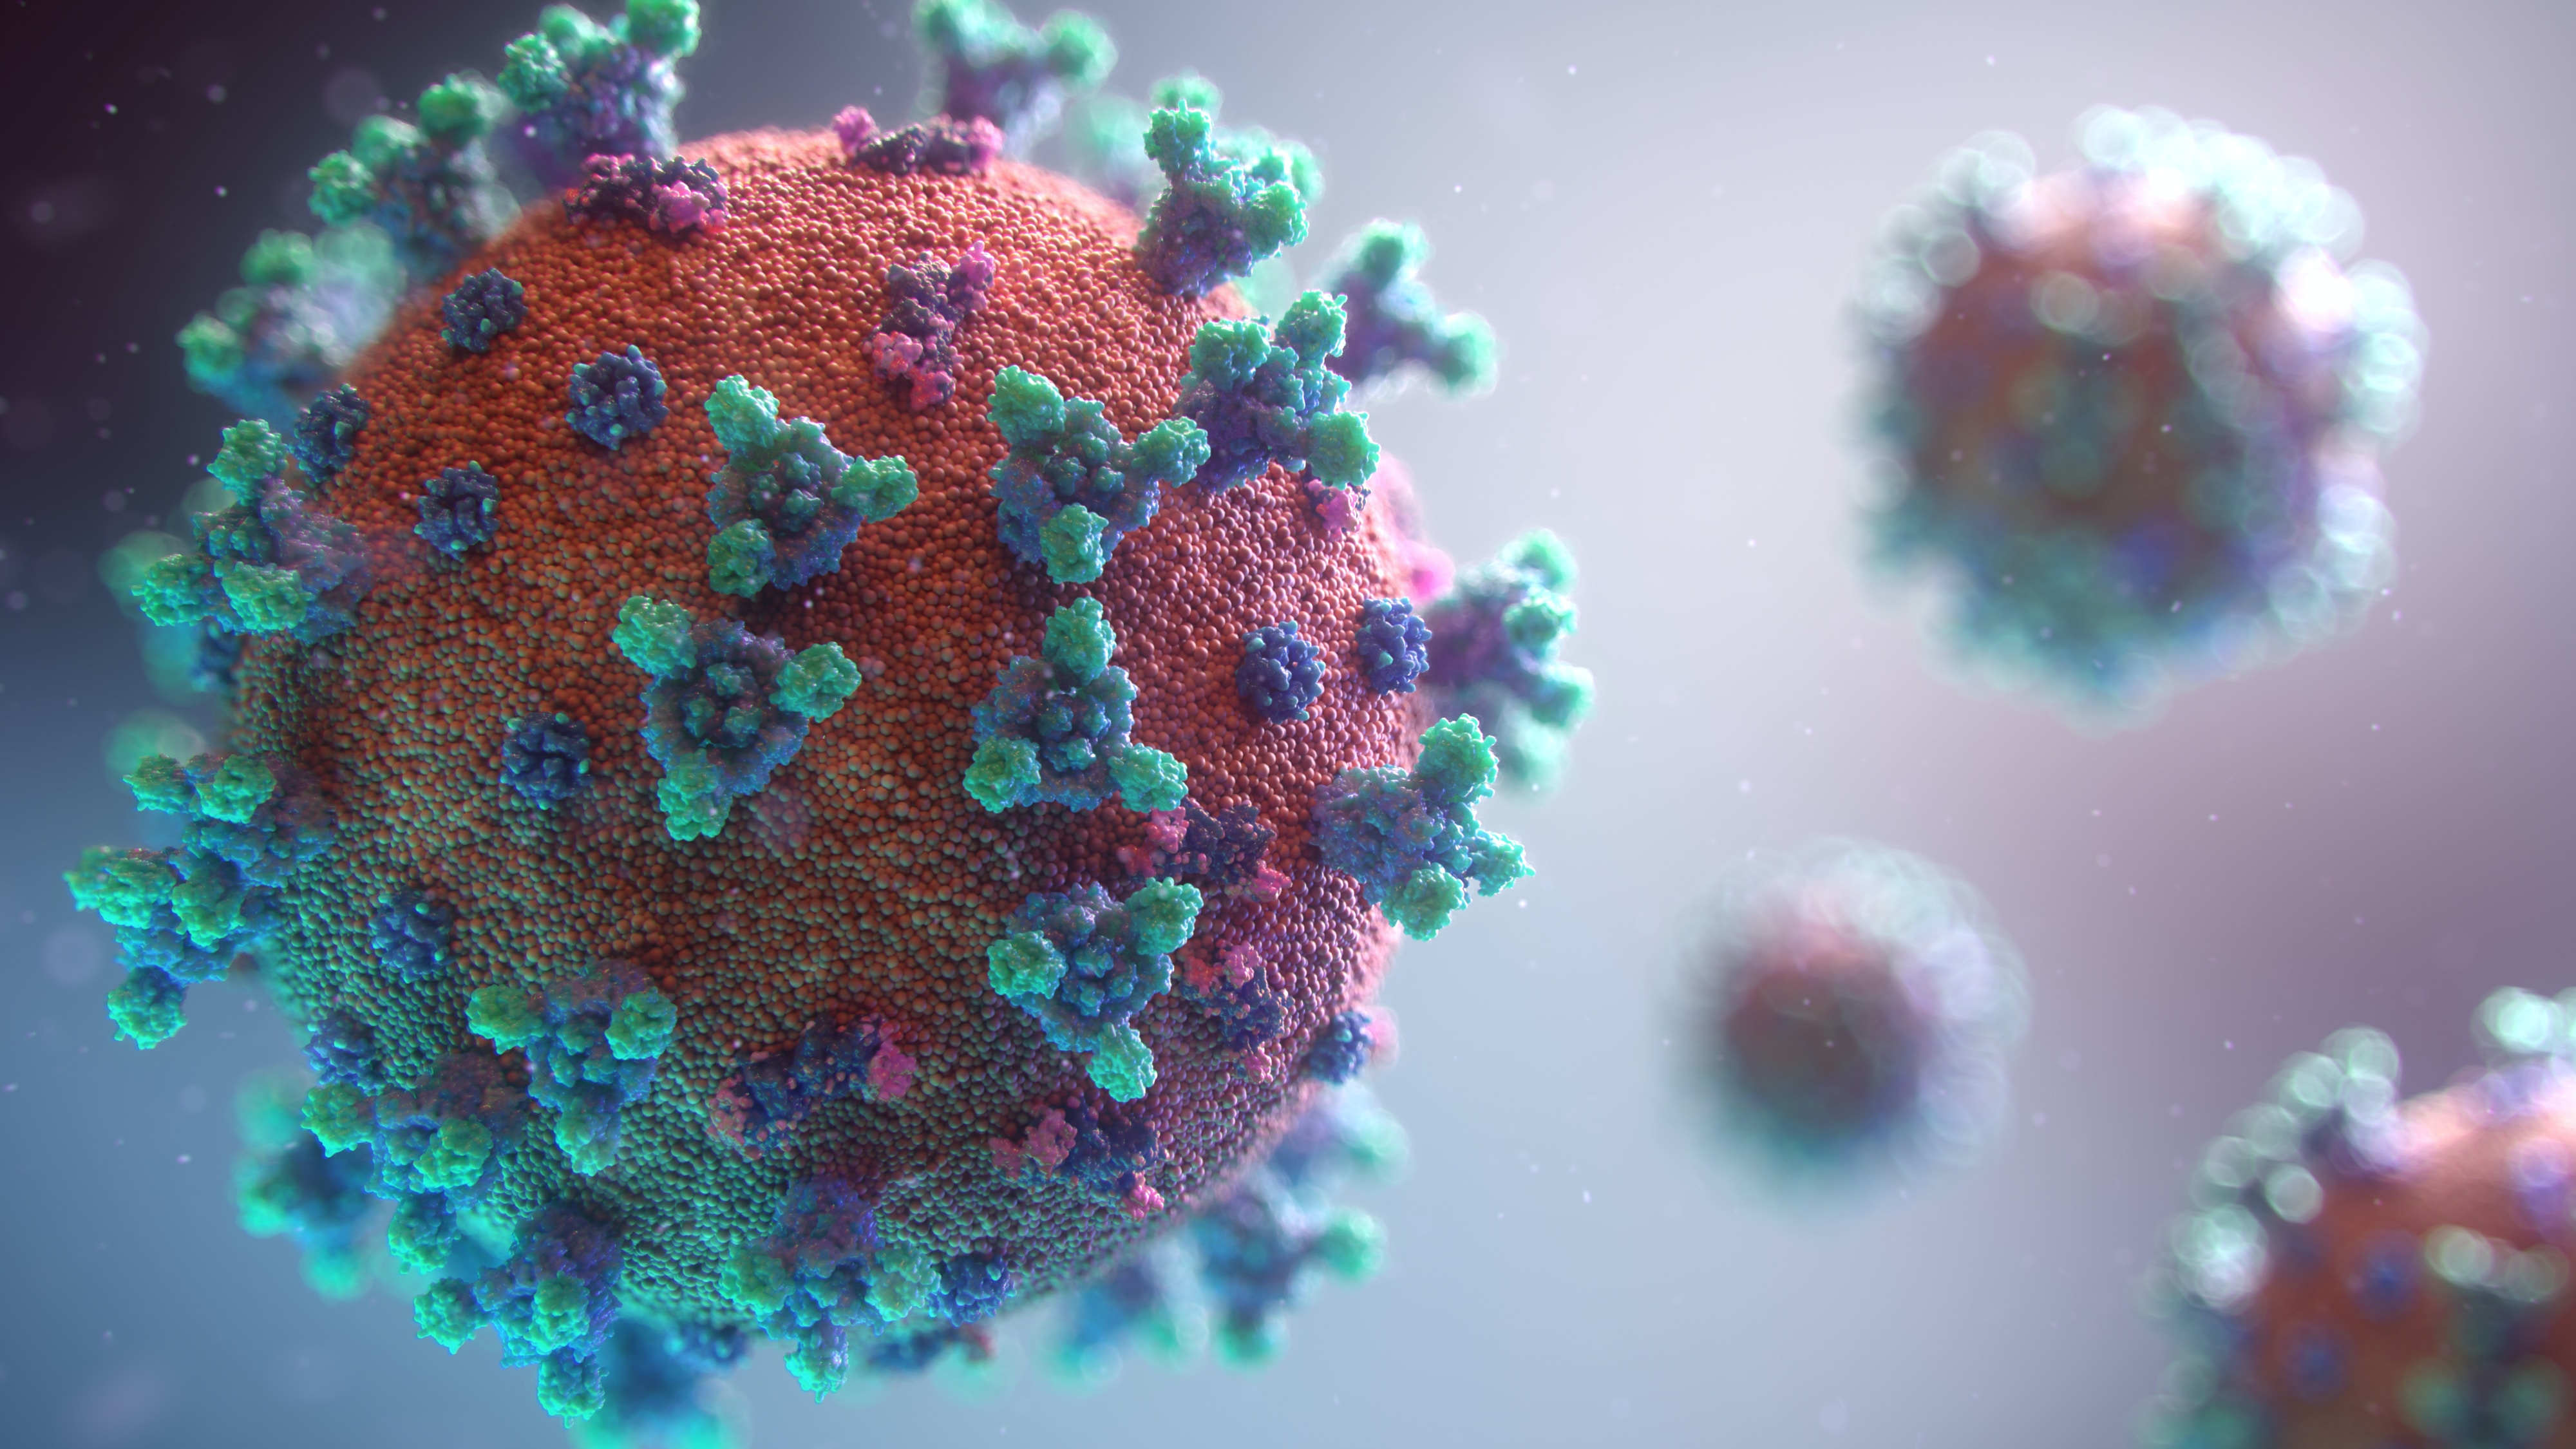

In [2]:
from IPython.display import Image
import pathlib
import pandas as pd
from sklearn.metrics import mean_squared_error
IMG_DIR = pathlib.Path.cwd().parent / 'imgs'
Image(IMG_DIR / "front_img.jpg")


### Introdução


No começo de 2020, o mundo se deparou - em um curto espaço de tempo - com uma pandemia global. Em questão de semanas, os países se encontravam em uma nova realidade. Foi necessário o estabelecimento de medidas de isolamento social para conter o vírus e frear o agressivo aumento no número de mortes. Apenas no ano de 2020, 1.8 milhão de pessoas perderam a vida (OurData, 2023).
Dado esse contexto, centenas de iniciativas foram criadas para desenvolver a vacina em tempo recorde. Ao final, um sucesso para a ciência e para a humanidade. Contrariando as expectativas dezenas de vacinas foram apresentadas já ao final de 2020- a vacina para caxumba foi desenvolvida em 4 anos, a mais rápida até então (UCLA, 2020). Em junho de 2020, ninguém tinha se vacinado. Em 14 de dezembro de 2021, quase 1 bilhão de indivíduos tinham recebido a primeira dose (Nature, 2022).

Entretanto, dada a escala da pandemia, havia muita demanda para pouca oferta. A produção de vacina era insuficiente. Assim, países mais ricos, que patrocinaram o desenvolvimento ou podiam arcar com os altos custos, foram favorecidos no recebimento de doses. 

Por outro lado, mesmo enfrentando número assustadores de mortes e amplas campanhas de vacinação, foi visto movimentos anti-vacinas espalhados pelo mundo. Tais grupos contestavam a segurança e eficácia da vacina e ganharam adesão mesmo em países mais ricos - a taxa de hesitação para se vacinar nos EUA em junho de 2021 era de 33,4%.

Dado a maior oferta vacinal disponível, esse estudo tem por objetivo analisar se países mais ricos conseguiram enfrentar a pandemia melhor do que os mais pobres. Foram analisados duas bases de dados: uma relacionado ao combate ao COVID e uma segunda com dados sociais e econômicos. A hipótese do projeto é que tais movimentos anti-vacinas refletem nos dados sociais e,assim, riqueza não é o único fator que indica o sucesso no combate ao vírus.


In [3]:
# Base de dados
DATA_DIR = pathlib.Path.cwd().parent / 'data'
DATA_DIR.mkdir(parents=True, exist_ok=True)
covid_data = DATA_DIR / 'covid-19-country-statistics-dataset.xlsx'
happ_data = DATA_DIR / 'Happiness - 2019.csv'
covid_data2 = DATA_DIR / 'covid-19-country-statistics-dataset.csv'
shape_file = DATA_DIR / "World_Countries__Generalized_.shp"


### Análise Exploratória

### Base de dados de COVID

In [4]:
df_covid = pd.read_excel(covid_data)
df_covid.head()


,Number,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active cases,Serious_Critical,Total Cases Per 1m Pop,...,Total Tests,Tests Per 1m Pop,Population,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1,USA,106613321,1809.0,1159697.0,35.0,104533271.0,920353.0,1392.0,318434,...,1.176759e+09,3514755.0,334805269,North America,3,289.0,0.0,5.0,0.1,2749.0
1,2,India,44924811,NaN,531424.0,NaN,44335977.0,5741.0,NaN,31938,...,9.250773e+08,657654.0,1406631776,Asia,31,2647.0,2.0,NaN,NaN,41.0
2,3,France,39974426,6609.0,166425.0,NaN,39669392.0,138609.0,869.0,60951,...,2.714902e+08,4139547.0,65584518,Europe,2,394.0,0.0,101.0,NaN,2113.0
3,4,Germany,38400766,NaN,172882.0,NaN,38189800.0,38084.0,NaN,457786,...,1.223324e+08,1458359.0,83883596,Europe,2,485.0,1.0,NaN,NaN,454.0
4,5,Brazil,37449418,NaN,701494.0,NaN,36249161.0,498763.0,NaN,173897,...,6.377617e+07,296146.0,215353593,South America,6,307.0,3.0,NaN,NaN,2316.0


A base de dado COVID contém algumas colunas sem identificação. Vamos deletar tais colunas

In [5]:
drop_columns = ["Unnamed: 14","Unnamed: 15", "Unnamed: 16",	"Unnamed: 17",	"Unnamed: 18",	"Unnamed: 19",	"Unnamed: 20"]
df_covid = df_covid.drop(drop_columns, axis=1)
df_covid.head()


,Number,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active cases,Serious_Critical,Total Cases Per 1m Pop,Deaths Per 1m Pop,Total Tests,Tests Per 1m Pop,Population
0,1,USA,106613321,1809.0,1159697.0,35.0,104533271.0,920353.0,1392.0,318434,3464.0,1.176759e+09,3514755.0,334805269
1,2,India,44924811,NaN,531424.0,NaN,44335977.0,5741.0,NaN,31938,378.0,9.250773e+08,657654.0,1406631776
2,3,France,39974426,6609.0,166425.0,NaN,39669392.0,138609.0,869.0,60951,2538.0,2.714902e+08,4139547.0,65584518
3,4,Germany,38400766,NaN,172882.0,NaN,38189800.0,38084.0,NaN,457786,2061.0,1.223324e+08,1458359.0,83883596
4,5,Brazil,37449418,NaN,701494.0,NaN,36249161.0,498763.0,NaN,173897,3257.0,6.377617e+07,296146.0,215353593


Agora vamos selecionar as colunas mais relevantes para a analise

In [6]:
covid_relevant_data = df_covid[["Country","Total Cases Per 1m Pop","Deaths Per 1m Pop","Tests Per 1m Pop","Population","Total Recovered"]]
covid_relevant_data = covid_relevant_data.dropna()

Como estamos usando dados relativos à 1 milhão de habitantes, a coluna Total Recoverd precisa ser convertida

In [7]:
covid_relevant_data["Recovered Per 1m Pop"] = covid_relevant_data['Total Recovered']/covid_relevant_data['Population']*1_000_000
covid_relevant_data.drop(["Population","Total Recovered"],axis=1,inplace=True)

In [8]:
covid_relevant_data = covid_relevant_data.dropna()

In [9]:
covid_relevant_data

,Country,Total Cases Per 1m Pop,Deaths Per 1m Pop,Tests Per 1m Pop,Recovered Per 1m Pop
0,USA,318434,3464.0,3514755.0,312221.104860
1,India,31938,378.0,657654.0,31519.248858
2,France,60951,2538.0,4139547.0,604859.091897
3,Germany,457786,2061.0,1458359.0,455271.373917
4,Brazil,173897,3257.0,296146.0,168323.920186
...,...,...,...,...,...
209,Macao,5269,181.0,1176.0,50862.185201
210,Saint Pierre Miquelon,59941,347.0,4410488.0,425247.438791
211,Wallis and Futuna,312056,637.0,1867419.0,39883.445638
214,Montserrat,282578,1611.0,3577442.0,277139.979859


In [10]:
covid_relevant_data.corr()

C:\Users\luisf\AppData\Local\Temp\ipykernel_6984\2253240641.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covid_relevant_data.corr()


,Total Cases Per 1m Pop,Deaths Per 1m Pop,Tests Per 1m Pop,Recovered Per 1m Pop
Total Cases Per 1m Pop,1.000000,0.414328,0.485164,0.610298
Deaths Per 1m Pop,0.414328,1.000000,0.246397,0.318906
Tests Per 1m Pop,0.485164,0.246397,1.000000,0.370633
Recovered Per 1m Pop,0.610298,0.318906,0.370633,1.000000


Como podemos observar pela matriz de correlação, a maioria das variáveis não possuem grade correlação entre elas. As únicas variávies correlacionadas em mais de 0.5 são Total Cases Per 1m Pop e Recovered Per 1m Pop. Uma hipótese para isso seria que quanto mais casos tiveram mais o governo local investiu em aparatos de saúde para conter a crise. 

array([[<Axes: title={'center': 'Total Cases Per 1m Pop'}>,
        <Axes: title={'center': 'Deaths Per 1m Pop'}>],
       [<Axes: title={'center': 'Tests Per 1m Pop'}>,
        <Axes: title={'center': 'Recovered Per 1m Pop'}>]], dtype=object)

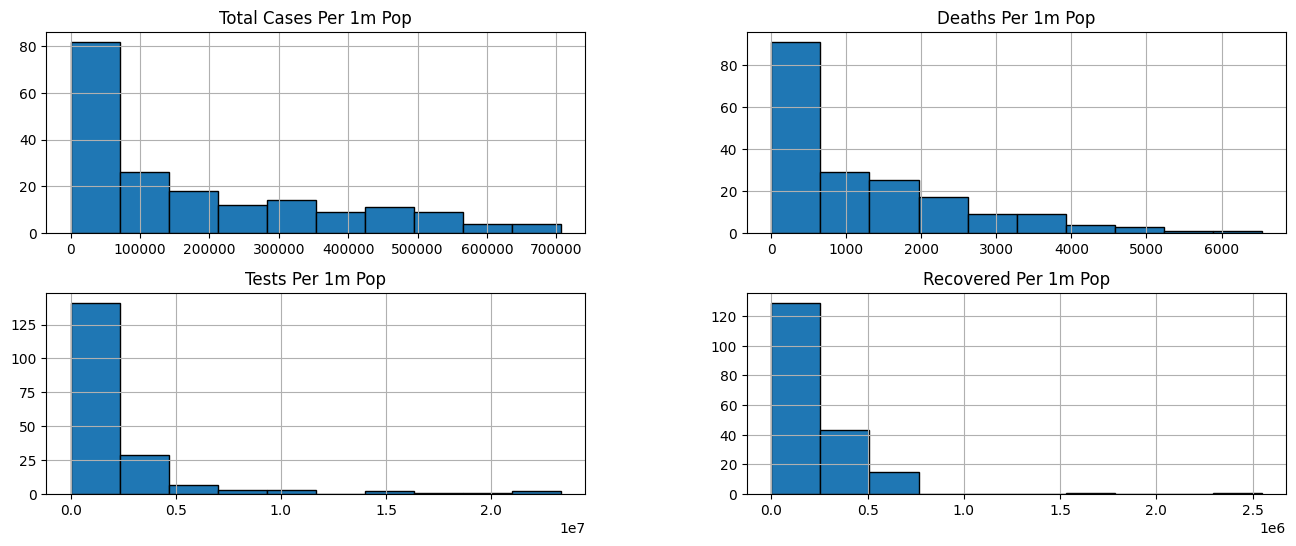

In [11]:
import matplotlib.pyplot as plt 

#define format for subplots
fig, axis = plt.subplots(2, 2, figsize=(16,6))

#create histogram for each column in DataFrame
covid_relevant_data.hist(ax=axis, edgecolor="black", grid=True)

Como podemos observar no histograma de testes por 1m Pop, temos uma cauda muito longa a esquerda, de modo a tirar os outliers, vamos fazer um corte em valores maiores que 0.5x10^7. <br>
De forma análoga, faremos um corte em valores maiores que 0.8*10^6 em Recoverd Per 1m Pop e 4000 em Deaths per 1m Pop

In [12]:
covid_relevant_data = covid_relevant_data.loc[covid_relevant_data["Tests Per 1m Pop"]<=0.5*10**7]
covid_relevant_data = covid_relevant_data.loc[covid_relevant_data["Recovered Per 1m Pop"]<=0.8*10**6]
covid_relevant_data = covid_relevant_data.loc[covid_relevant_data["Deaths Per 1m Pop"]<=4000]

<Axes: >

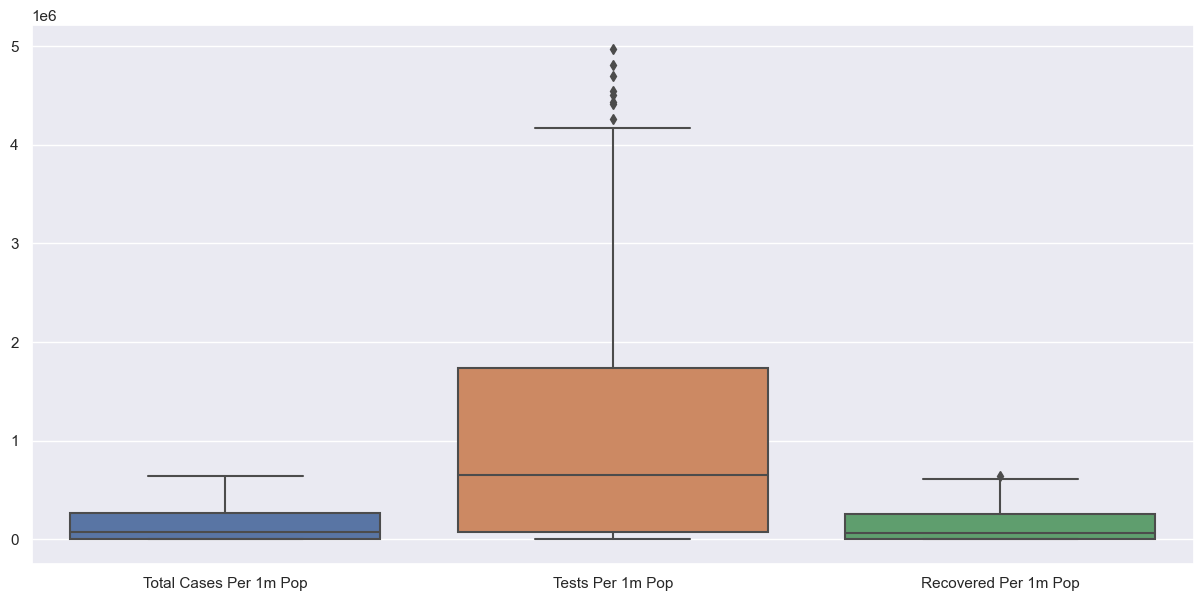

In [14]:
import seaborn as sns
sns.set(rc={"figure.figsize":(15,7)})
sns.boxplot(data=covid_relevant_data.drop(["Deaths Per 1m Pop"],axis=1))

<Axes: >

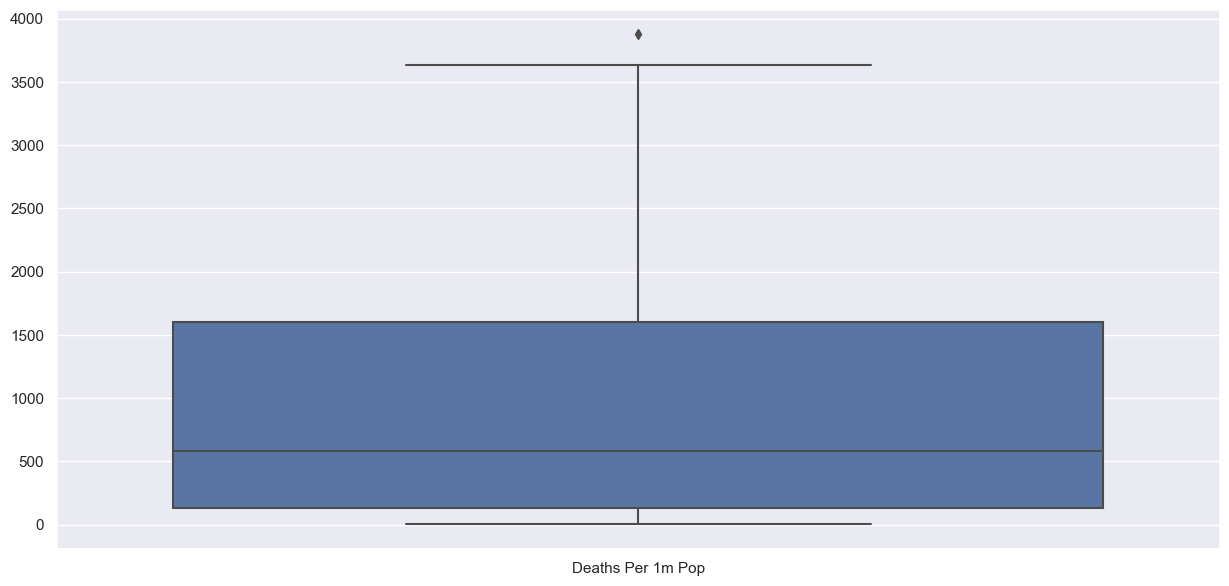

In [15]:
sns.boxplot(data=covid_relevant_data.drop(["Total Cases Per 1m Pop","Tests Per 1m Pop","Recovered Per 1m Pop"],axis=1))

### Base de dados World Happiness Report

O World Happiness Report é uma iniciativa da Rede de Soluções para o Desenvolvimento Sustentável das Nações Unidas, que visa medir e analisar a felicidade e o bem-estar em todo o mundo. O relatório é baseado em uma ampla gama de indicadores sociais, econômicos e de saúde.
Os indicadores são:
- GDP per capita - Produto Interno Bruto per capta de um país. É uma medida de riqueza do país.
- Social Support - Mede a presença de um sistema de apoio social, levanto em conta fatores como disponibilidade dos familiares, amigos e outras redes de apoio.
- Healthy Life Expectancy - Representa a expectativa de vida saudável em um determinado país. Esse parâmetro leva em consideração a qualidade e a duração da vida em termos de saúde física e mental.
- Freedom to Make Life Choice -  Refere-se à liberdade que as pessoas têm para tomar decisões sobre suas vidas. Esse fator leva em consideração o grau de autonomia, independência e capacidade de tomar decisões pessoais.
- Generosity - Essa variável mede o grau de generosidade e altruismo da população de um país. Ela abrange comportamentos como doações para caridade, voluntariado e outras ações que visam ajudar os outros.
- Perceptions of Corruption - Refere-se à percepção de corrupção em um país. Essa variável avalia o nível de confiança nos órgãos governamentais e nos processos políticos.


In [16]:
df_happ = pd.read_csv(happ_data)
df_happ.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [17]:
df_happ.corr()

C:\Users\luisf\AppData\Local\Temp\ipykernel_6984\1495080879.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_happ.corr()


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


Tirando as variáveis overall rank e score, que logicamente tem uma correlação muito grande com as outras variáveis, podemos perceber que as variávies social support e healthy life expectancy tem uma alta correlação entre sí e com GDP per capita.

array([[<Axes: title={'center': 'GDP per capita'}>,
        <Axes: title={'center': 'Social support'}>,
        <Axes: title={'center': 'Healthy life expectancy'}>],
       [<Axes: title={'center': 'Freedom to make life choices'}>,
        <Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Perceptions of corruption'}>]],
      dtype=object)

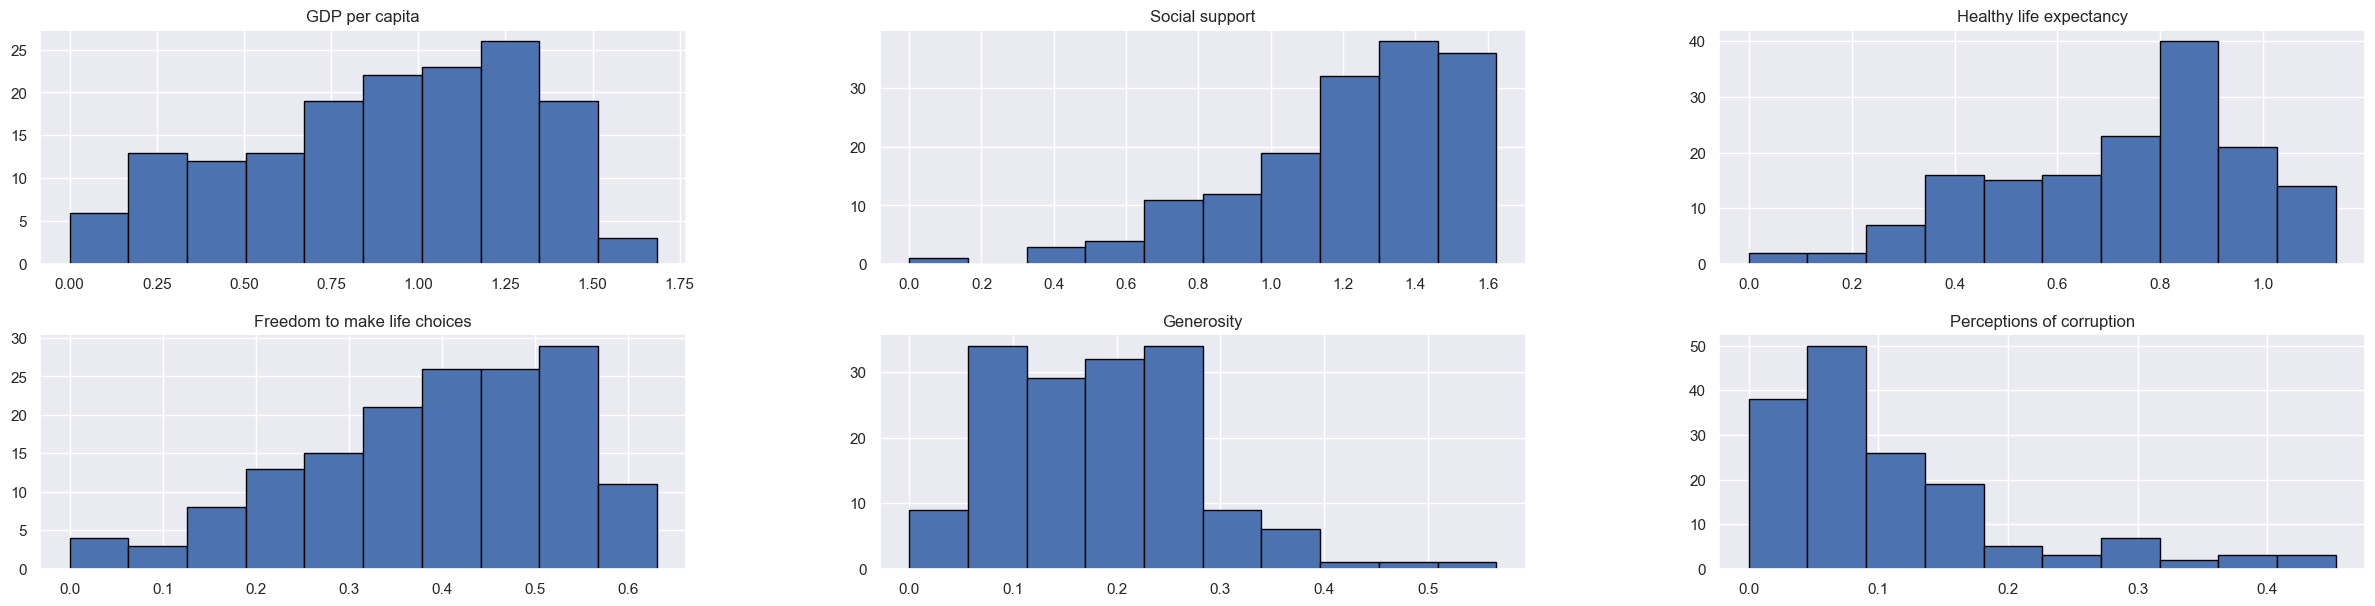

In [18]:
happ_relevant_variable = df_happ.drop(["Overall rank","Score"],axis=1)
#define format for subplots
fig, axis = plt.subplots(2, 3, figsize=(30,7))

#create histogram for each column in DataFrame
happ_relevant_variable.hist(ax=axis, edgecolor="black", grid=True)

As caudas da distribuição, também chamados de outliers, são pontos que divergem, desviam muito do padrão da amostra. Esses valores extremos podem distorcer a relação entre as variáveis ​​e afetar negativamente a qualidade da regressão linear. Ao remover os outliers, podemos minimizar seu impacto indesejado e obter uma análise mais precisa da relação entre as variáveis. Isso ajuda a garantir que o modelo de regressão seja ajustado adequadamente aos dados e possa fornecer previsões mais precisas e confiáveis. Além disso, ao realizar a limpeza dos outliers, é possível evitar que esses pontos atípicos influenciem negativamente na interpretação dos coeficientes e na tomada de decisões baseadas no modelo de regressão linear

In [19]:
happ_relevant_variable = happ_relevant_variable.loc[(happ_relevant_variable["GDP per capita"]<= 1.5)\
    & (happ_relevant_variable["Social support"] >= 0.6) \
    & (happ_relevant_variable["Healthy life expectancy"] >= 0.4)\
    & (happ_relevant_variable["Freedom to make life choices"] >= 0.2)\
    & (happ_relevant_variable["Generosity"]<= 0.35) \
    & (happ_relevant_variable["Perceptions of corruption"] <= 0.2)]

In [20]:
happ_relevant_variable

,Country,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
11,Costa Rica,1.034,1.441,0.963,0.558,0.144,0.093
12,Israel,1.276,1.455,1.029,0.371,0.261,0.082
18,United States,1.433,1.457,0.874,0.454,0.280,0.128
19,Czech Republic,1.269,1.487,0.920,0.457,0.046,0.036
22,Mexico,1.070,1.323,0.861,0.433,0.074,0.073
...,...,...,...,...,...,...,...
139,India,0.755,0.765,0.588,0.498,0.200,0.085
140,Liberia,0.073,0.922,0.443,0.370,0.233,0.033
145,Zimbabwe,0.366,1.114,0.433,0.361,0.151,0.089
147,Botswana,1.041,1.145,0.538,0.455,0.025,0.100


<Axes: >

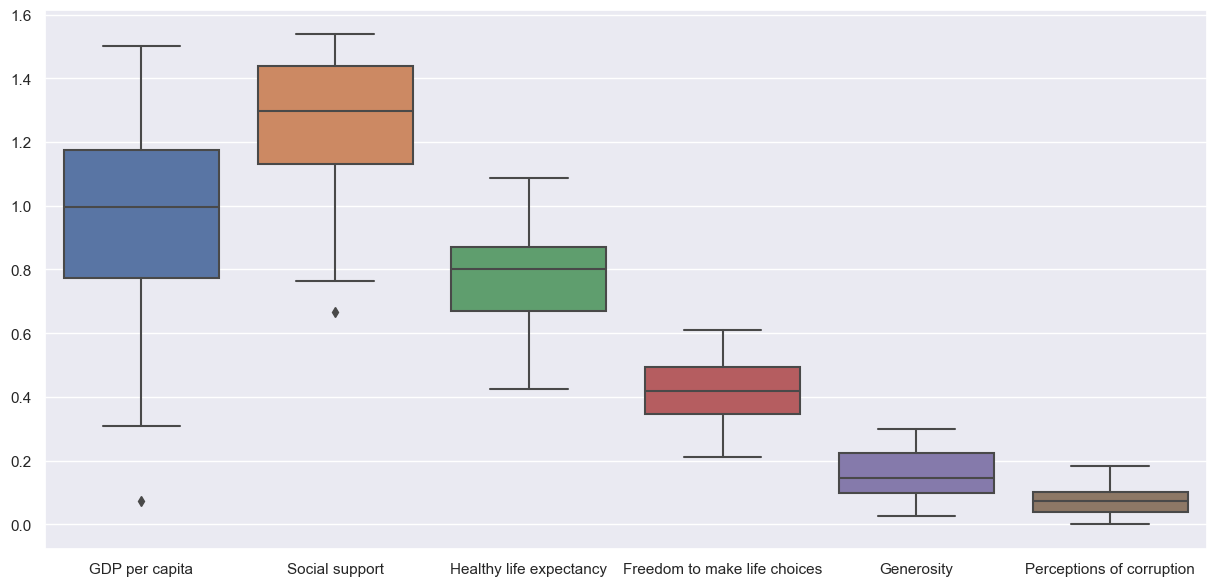

In [21]:
sns.boxplot(data=happ_relevant_variable)

In [22]:
df = pd.merge(covid_relevant_data, happ_relevant_variable, on='Country')
df


,Country,Total Cases Per 1m Pop,Deaths Per 1m Pop,Tests Per 1m Pop,Recovered Per 1m Pop,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,India,31938,378.0,657654.0,31519.248858,0.755,0.765,0.588,0.498,0.200,0.085
1,France,60951,2538.0,4139547.0,604859.091897,1.324,1.472,1.045,0.436,0.111,0.183
2,Brazil,173897,3257.0,296146.0,168323.920186,1.004,1.439,0.802,0.390,0.099,0.086
3,Japan,268261,593.0,795576.0,172992.801886,1.327,1.419,1.088,0.445,0.069,0.140
4,Italy,427548,3146.0,4498897.0,422142.277894,1.294,1.488,1.039,0.231,0.158,0.030
...,...,...,...,...,...,...,...,...,...,...,...
61,Gabon,21008,131.0,695641.0,20876.393343,1.057,1.183,0.571,0.295,0.043,0.055
62,Mauritius,32986,818.0,281374.0,31604.414122,1.120,1.402,0.798,0.498,0.215,0.060
63,Gambia,4935,145.0,60851.0,4764.153119,0.308,0.939,0.428,0.382,0.269,0.167
64,Liberia,1525,56.0,26356.0,1467.074147,0.073,0.922,0.443,0.370,0.233,0.033


In [23]:
features_columns = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
features = df[features_columns].copy()

In [24]:
y = df["Deaths Per 1m Pop"].copy()

In [25]:
print(features.shape, y.shape)

(66, 6) (66,)


### Shuffle Split

Para analisar o impacto de cada fator socio-econômico no modelo linear foi realizado o Shuffle Split (Scikit-learn). Ele consistiu na separação da base de dados em 25% treinamento e 75% teste. Esse separação foi feita 10 mil vezes de maneira randômica. Assim, ao final, aplicando no modelo linear, foi obtido o coeficiente para cada feature 10 mil vezes. A partir do histograma de tais valores, foi possível analisar o impacto de cada um no modelo.


In [26]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import numpy as np
coef_values = []
RMSE_values = []
r_squared_values = []

rs = ShuffleSplit(n_splits=10000, test_size=.25, random_state=0)
rs.get_n_splits(features)
print(rs)

for i, (train_index, test_index) in enumerate(rs.split(features)):
    #print(f"Fold {i}:")
    #print(f"  Train: index={train_index}")
    #print(f"  Test:  index={test_index}")
    Xtrain_lista = []
    Xtest_lista = []
    ytrain_lista = []
    ytest_lista = []

        
    for train_index in train_index:
        Xtrain_lista.append(features.iloc[train_index])
        ytrain_lista.append(y.iloc[train_index])    
    
    for test_index in test_index:
        Xtest_lista.append(features.iloc[test_index])
        ytest_lista.append(y.iloc[test_index])
    
    Xtrain = pd.DataFrame(Xtrain_lista)    
    Xtest = pd.DataFrame(Xtest_lista) 
    ytrain = pd.DataFrame(ytrain_lista)
    ytest = pd.DataFrame(ytest_lista)

    model = LinearRegression()
    
    model.fit(Xtrain, ytrain)
    coef_values.append(model.coef_)
    ypred = model.predict(Xtest)
    RMSE = np.sqrt(mean_squared_error(ytest, ypred))
    RMSE_values.append(RMSE)
    r_squared = r2_score(ytest, ypred)
    r_squared_values.append(r_squared)





ShuffleSplit(n_splits=10000, random_state=0, test_size=0.25, train_size=None)


In [27]:
coef_values[0:10]

[array([[   667.89191723,    510.3548201 ,   2226.56766355,
          -2710.02350995,  -3035.25644824, -10751.65478099]]),
 array([[  -15.25372037,  1460.99772141,  1426.83108519, -1709.47343229,
         -3784.50156828, -8272.93569646]]),
 array([[ -200.29720438,  1823.07852424,  1536.28615946, -1198.35307029,
         -3887.5938944 , -4981.51352229]]),
 array([[ -355.89632427,   824.87610082,  2951.11497048, -1621.56720815,
         -3113.61854996, -4212.17651609]]),
 array([[  624.2185405 ,   754.0907118 ,  2027.80210206,  -994.83388104,
         -2513.60174167, -7180.22357416]]),
 array([[  634.62283669,   746.89680834,  1898.14325246, -1077.42379298,
         -2035.24294133, -6842.01685157]]),
 array([[  185.64642755,  1510.69969685,  3205.72435983, -1974.30535785,
         -2269.41040994, -7178.41812953]]),
 array([[  198.02837653,   813.59876704,  2542.93072909, -3167.5293239 ,
         -1084.09334834, -6422.4871622 ]]),
 array([[  232.37923285,  1796.06269955,  1504.34452499,  

In [28]:
GDP_coef = []
Social_coef = []
Health_coef = []
Freedom_coef = []
Generosity_coef = []
Corruption_coef = []
for i in range(0,1000):
    GDP_coef.append(coef_values[i][0][0])
    Social_coef.append(coef_values[i][0][1])
    Health_coef.append(coef_values[i][0][2])
    Freedom_coef.append(coef_values[i][0][3])
    Generosity_coef.append(coef_values[i][0][4])
    Corruption_coef .append(coef_values[i][0][5])
    
    

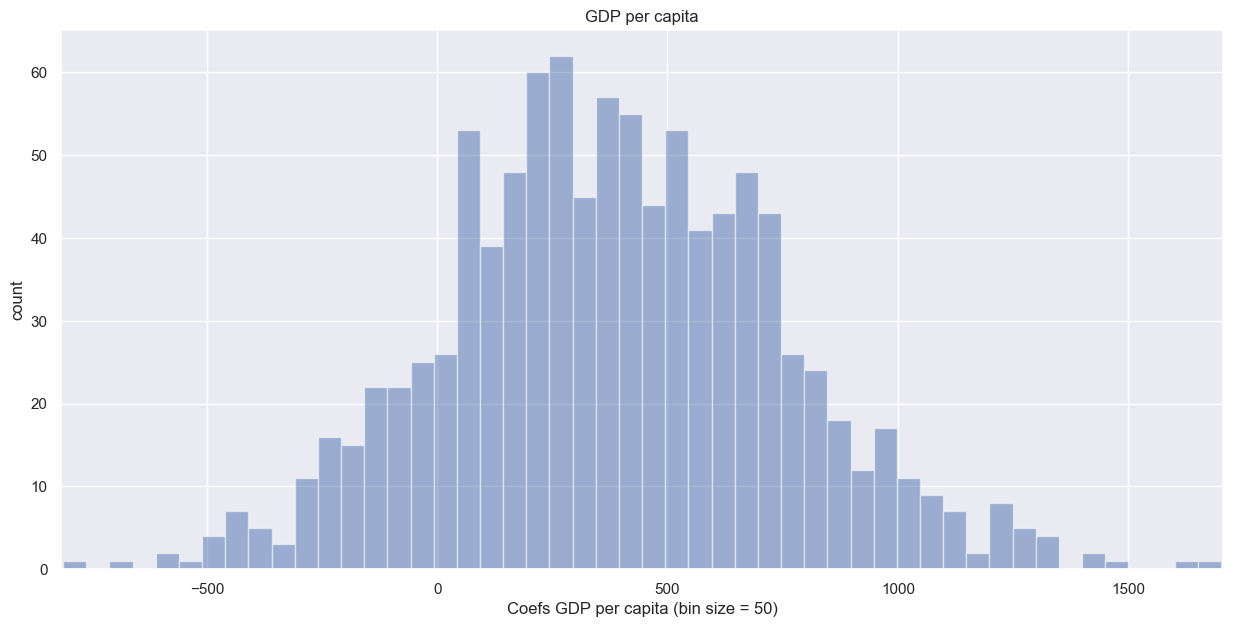

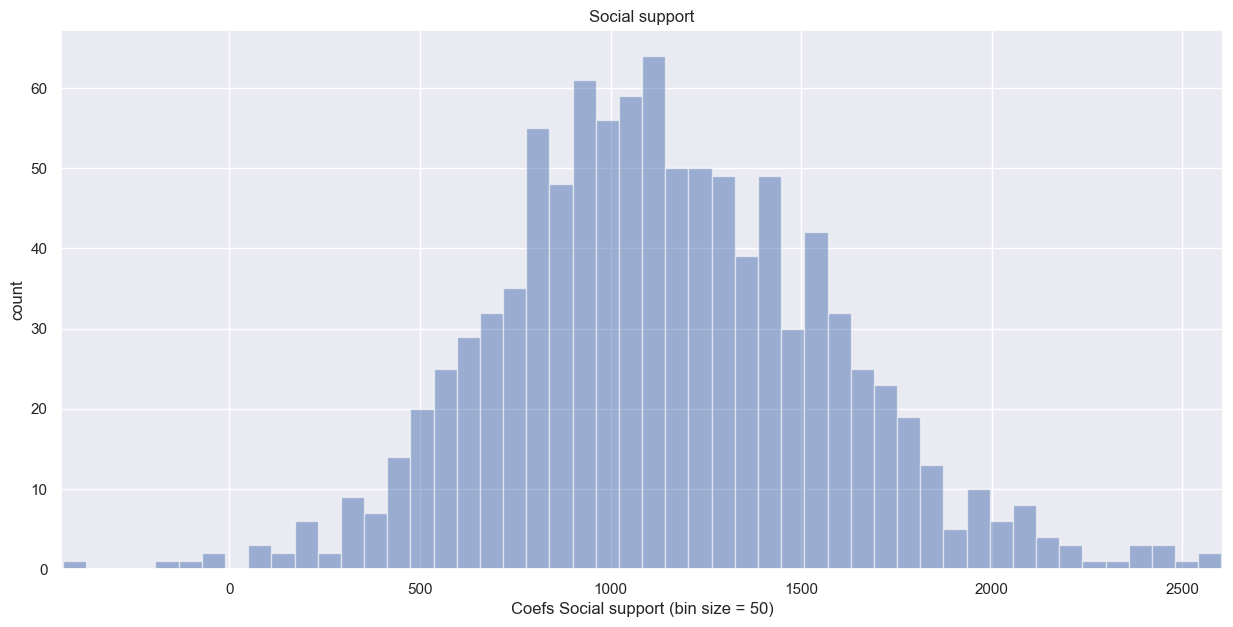

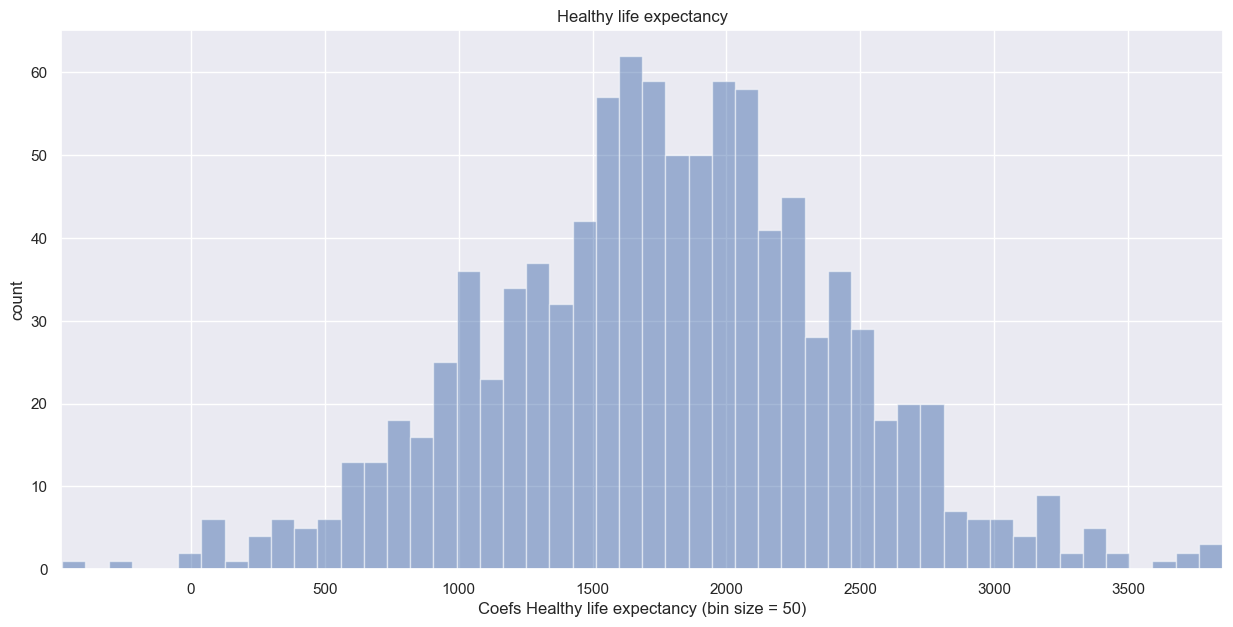

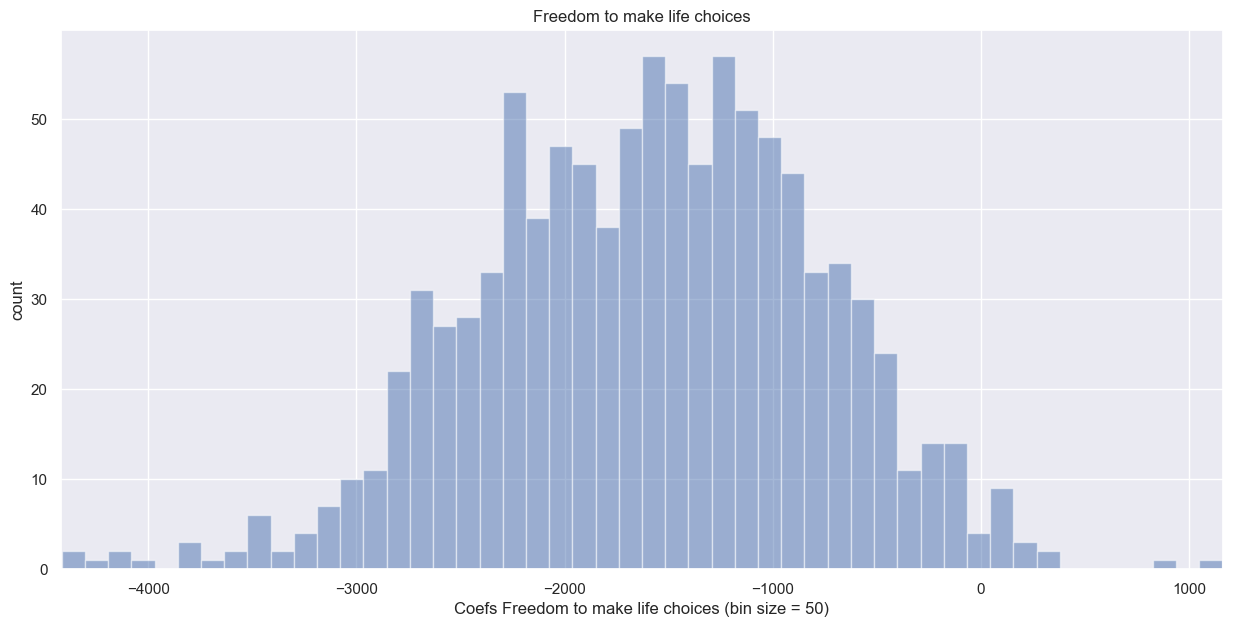

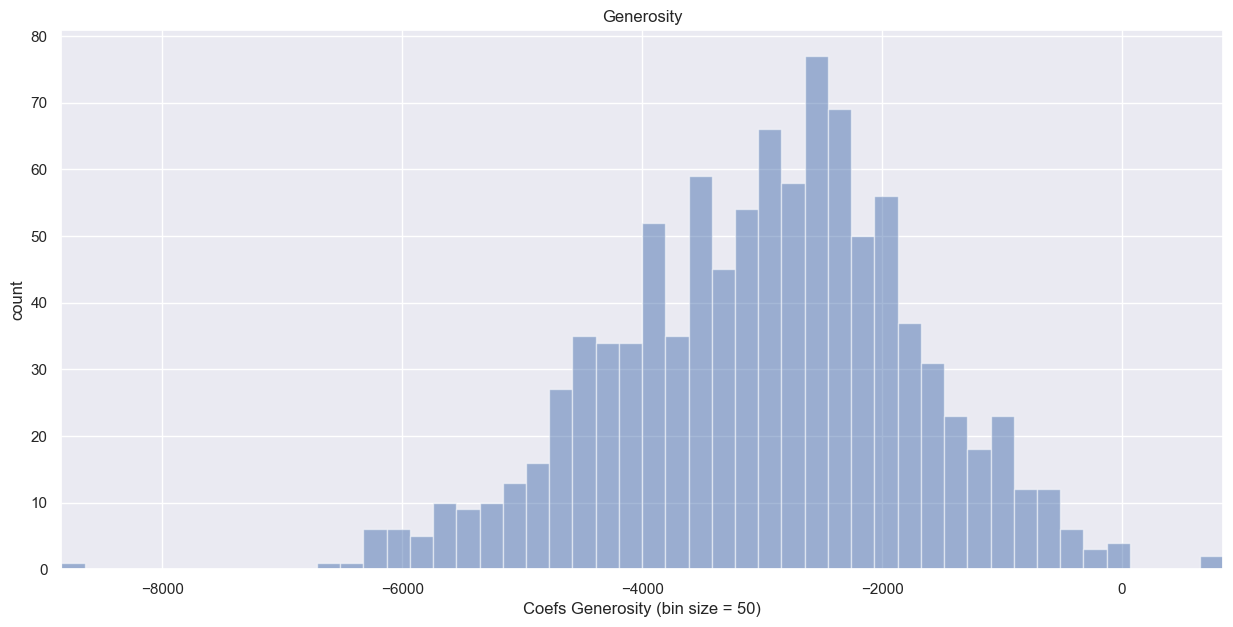

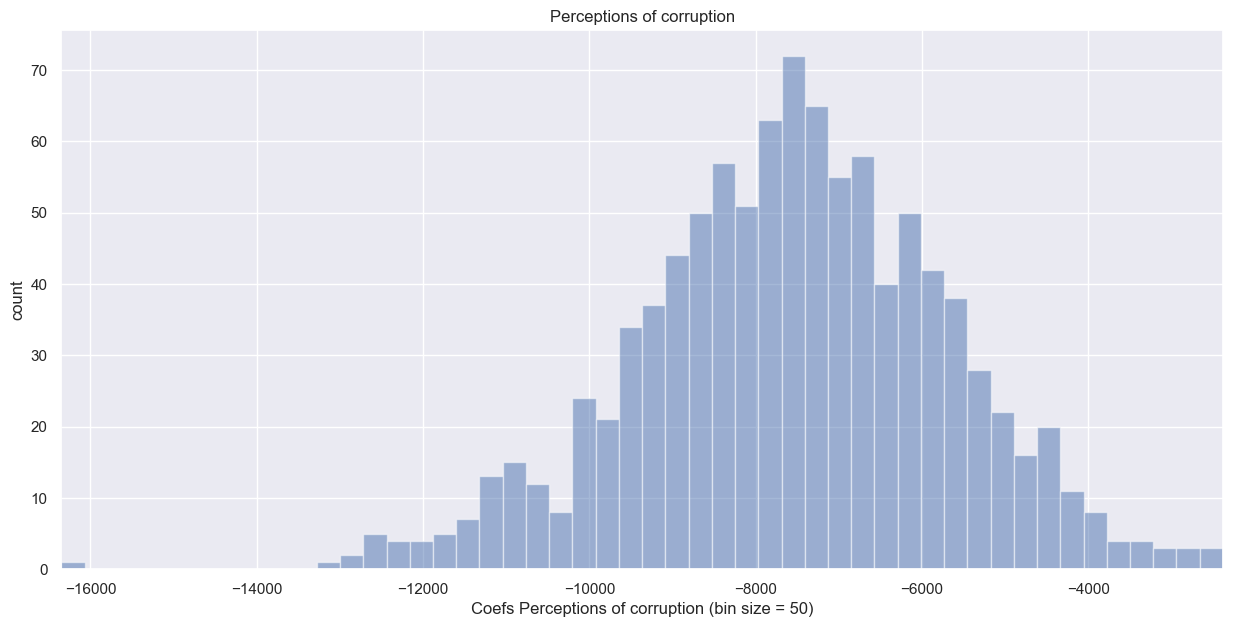

In [29]:
coefs = [ GDP_coef, Social_coef, Health_coef, Freedom_coef, Generosity_coef, Corruption_coef]
n = 0
for coef in coefs:
    plt.xlim([min(coef)-5, max(coef)+5])
    plt.hist(coef, bins=50, alpha=0.5)
    plt.title(features_columns[n])
    plt.xlabel("Coefs " + features_columns[n] + ' (bin size = 50)')
    plt.ylabel('count')

    plt.show()
    n+=1
    


A partir dos 10 mil valores dos coeficientes foi realizado um histograma para cada feature.

### PIB per Capita

 O histograma dos coeficientes de PIB per Capta estão levemente pendendo para a direita, indicando uma relação positiva entre a riqueza do país e o número de mortes por COVID. Hipóteses para explicar esse fenômeno são as seguintes (BAYATI, 2021): países mais ricos têm maior porcentagem da população envelhecida, doenças cardiovasculars e diabetes são catalisadores de morte por COVID e são mais comuns em países mais ricos e há melhores condições de medição de casos e mortes.

### Suporte Social

O histograma do suporte social se assemelha a uma curva normal, com média positva. Assim, quanto mais o suporte social maior o número de mortes por covid. Uma hipótese para explicar isso é essa rede de cooperação atrapalhou o isolamento social, aumentando a disperção da doença

### Expectativa de Vida

O histograma da expectativa de vida também apresenta formato que lembra a curva de Gauss, mas com média positiva. Assim, maiores expectativas de vida aumenta o número de mortes por COVID, por habitante. A hipótese do grupo é que países com maior expectativa de vida possuem mais pessoas com idade avançada, ou seja, no grupo de risco.

### Liberdade
O histograma de liberdade tem média negativa e apenas uma parte pequena de sua cauda, a direita, passa por zero. Devido à isso não podemos discartar a hipótese nula de que essa variável é relevante para explicar o número de mortes. Os coeficientes gerados foram negativos, o que mostra que quanto mais livre for um país menor o número de morte por COVID. A liberdade pode promover a cooperação entre governos, instituições, comunidades e indivíduos. Países com maior liberdade podem ter uma cultura de engajamento cívico e participação ativa da população no enfrentamento da crise. Isso pode resultar em esforços conjuntos para seguir as orientações de saúde, compartilhar informações relevantes e buscar soluções coletivas.

### Generosidade
O coeficiente negativo para a variável de generosidade pode sugerir que países mais generosos têm uma menor taxa de mortalidade por COVID-19. Isso pode estar relacionado ao comportamento social, como o apoio mútuo e a cooperação entre os cidadãos, que podem levar a um melhor cumprimento das medidas de saúde e a uma resposta coletiva mais eficaz durante a pandemia.

### Percepção de Corrupção
O coeficiente negativo para a variável de corrupção pode indicar que a corrupção percebida está associada a uma maior taxa de mortalidade por COVID-19. A corrupção pode enfraquecer a capacidade do governo de responder efetivamente à pandemia, resultando em uma disseminação mais ampla do vírus, falta de recursos adequados e acesso desigual aos serviços de saúde.

## RMSE

In [275]:
min(RMSE_values)

532.3620579126698

<Axes: >

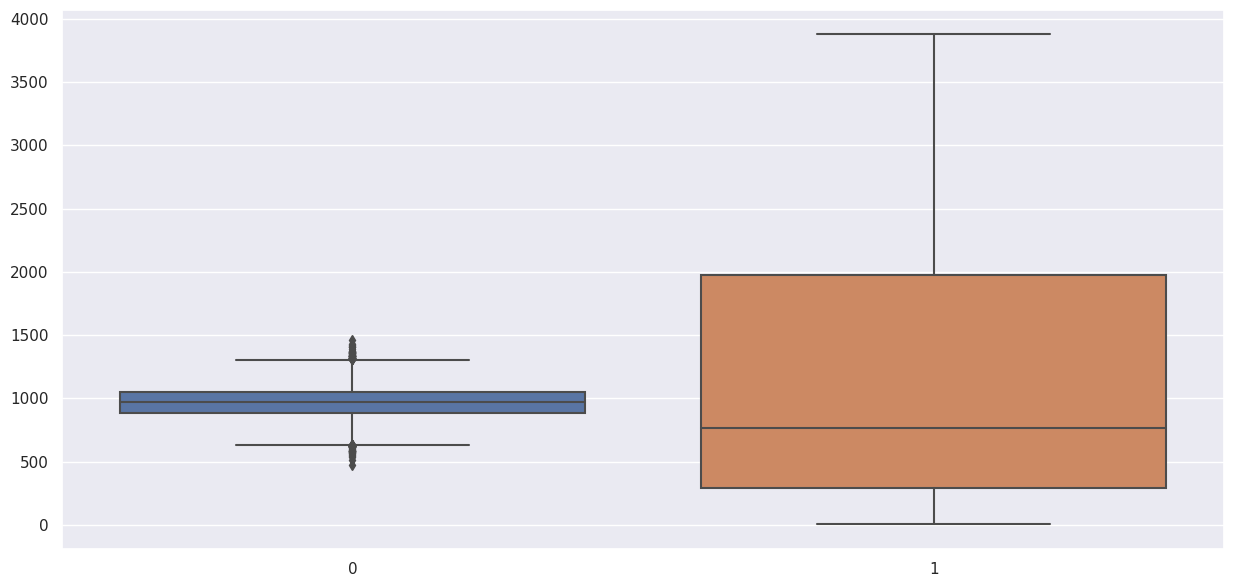

In [251]:
sns.boxplot(data=[RMSE_values,df["Deaths Per 1m Pop"]])

O valor do RSME foi muito próximo a média de mortes por 1 milhão de habitantes. Isso indica que o modelo tem um ajuste relativamente pobre aos dados. O RMSE mede o desvio médio dos valores previstos em relação aos valores reais, e se esse desvio for comparável à magnitude dos próprios valores reais, temos fortes evidências de queo modelo não está sendo capaz de fazer previsões precisas.

## Tentando melhorar o poder de previsão do nosso modelo

# Fazendo polynomial features

In [219]:
from sklearn.preprocessing import PolynomialFeatures
features_columns = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
X = df[features_columns].copy()
y = df["Deaths Per 1m Pop"].copy().values
transform = PolynomialFeatures(degree=2, include_bias=False)
transform.fit(X)
x_transformado = transform.transform(X)

In [220]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 10


Xtrain, Xtest, ytrain, ytest = train_test_split(
    x_transformado,
    y,
    test_size=0.25,
    random_state=RANDOM_SEED,
)
model = LinearRegression()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
RMSE = np.sqrt(mean_squared_error(ytest, ypred))
RMSE

2472.0818469895826

As "features" polinomiais tiveram o efeito oposto do esperado, ou seja, prejudicaram a performance do modelo.

### Conclusão 
O modelo construído com base nos dados de felicidade não foi capaz de fornecer previsões satisfatórias para o número de mortes por COVID-19. Esse resultado indica a complexidade do tema e sugere que o fenômeno das mortes por COVID-19 não pode ser adequadamente explicado por apenas algumas variáveis isoladas. Em vez disso, a compreensão completa desse fenômeno requer uma análise mais abrangente e a consideração de um contexto socioeconômico mais amplo. <br>

### Referências:

[1] - OurData: https://ourworldindata.org/explorers/coronavirus-data-explorer

[2] - UCLA Health: https://www.uclahealth.org/news/the-fastest-vaccine-in-history#:~:text=How%20scientists%20created%20safe%2C%20effective,19%20vaccines%20in%20record%20time.&text=The%20COVID%2D19%20vaccines%20coming,the%20fastest%20vaccines%20ever%20created.

[3] - Nature: https://www.nature.com/articles/s41467-022-31441-x

[4] - Scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit

[5] - Base de dados Covid: https://www.kaggle.com/datasets/harshghadiya/covid-19-country-statistics-dataset

[6] - Base de dados Felicidade: https://www.kaggle.com/datasets/unsdsn/world-happiness

[7] - Bayatu, Mohsen: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8542832/

In [131]:
print("EOF")

EOF
